Hello World!, I'm [Chuene Komane](https://www.linkedin.com/in/chuene-komane-b61291208)  an aspiring data professional. Welcome to my playground! 

I'm an avid movie and series geek (aren't we all in this age of streaming services?), I thought it would be interesting to dive into one of the most popular streaming sites AKA Netflix's dataset to discover what I can find so LET'S GOOO!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
netflix_data=pd.read_csv('netflix_titles.csv',index_col=0)
netflix_data.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


REALLY EXCITED TO DIG INTO THIS, LET'S GOOOO!

In [3]:
netflix_data.shape

(8807, 11)

Fairly large dataset, with 8807 rows and 11 columns.

In [4]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8807 entries, s1 to s8807
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8807 non-null   object
 1   title         8807 non-null   object
 2   director      6173 non-null   object
 3   cast          7982 non-null   object
 4   country       7976 non-null   object
 5   date_added    8797 non-null   object
 6   release_year  8807 non-null   int64 
 7   rating        8803 non-null   object
 8   duration      8804 non-null   object
 9   listed_in     8807 non-null   object
 10  description   8807 non-null   object
dtypes: int64(1), object(10)
memory usage: 825.7+ KB


All except one column are of dtype==object

In [5]:
#how many cells in each of the columns have null values:
netflix_data.isna().sum()

type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Looks like a lot of the shows/movies haven't listed their directors, cast, and country

In [6]:
#check if there are any duplicate rows in the dataset
netflix_data.duplicated().sum()

0

No Duplicate Rows

TIME FOR SOME GOOD OLD DATA CLEANING!

In [7]:
df=netflix_data.copy()
df=df.dropna()
df.shape

(5332, 11)

In [8]:
print('Dropping rows with null values will result in {}% of the data lost'.format(round((df.shape[0]/netflix_data.shape[0])*100,2)))

Dropping rows with null values will result in 60.54% of the data lost


Can't really drop most of the rows with missing values as that would be a significant part of the dataset. Guess I will have to impute most of the missing values.

In [9]:
#filling the null values in the directors column with 'Unknown'
netflix_data['director'].fillna('Unknown',inplace=True)
#filling the null values in the cast column with 'Unknown'
netflix_data['cast'].fillna('Unknown',inplace=True)
#filling the null values in the country column with 'Unknown'
netflix_data['country'].fillna('Unknown',inplace=True)

In [10]:
netflix_data.isna().sum()

type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64

In [11]:
#rows with missing date added
netflix_data[netflix_data['date_added'].isna()]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s6067,TV Show,A Young Doctor's Notebook and Other Stories,Unknown,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
s6175,TV Show,Anthony Bourdain: Parts Unknown,Unknown,Anthony Bourdain,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
s6796,TV Show,Frasier,Unknown,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
s6807,TV Show,Friends,Unknown,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
s6902,TV Show,Gunslinger Girl,Unknown,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
s7197,TV Show,Kikoriki,Unknown,Igor Dmitriev,Unknown,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
s7255,TV Show,La Familia P. Luche,Unknown,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
s7407,TV Show,Maron,Unknown,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
s7848,TV Show,Red vs. Blue,Unknown,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."


In [12]:
#When were most of the shows/movies on netflix added?
netflix_data['date_added'].value_counts().sort_values(ascending=False)[:10]

January 1, 2020      109
November 1, 2019      89
March 1, 2018         75
December 31, 2019     74
October 1, 2018       71
October 1, 2019       60
November 1, 2018      60
July 1, 2021          60
September 1, 2021     56
July 1, 2019          52
Name: date_added, dtype: int64

Most of the movies/shows on netflix were added on the first of January 2020, let's fill the missing dates with that.

In [13]:
netflix_data['date_added'].fillna(netflix_data['date_added'].mode()[0],inplace=True)
netflix_data['date_added'].isna().sum()

0

In [14]:
print('Even though there are no more null values in the date_added column, it\'s datatype is still {}'.format(netflix_data['date_added'].dtype))

Even though there are no more null values in the date_added column, it's datatype is still object


In [15]:
#transform the date_added column to datetime dtype
netflix_data['date_added']=pd.to_datetime(netflix_data['date_added'],infer_datetime_format=True)
netflix_data['date_added']

show_id
s1      2021-09-25
s2      2021-09-24
s3      2021-09-24
s4      2021-09-24
s5      2021-09-24
           ...    
s8803   2019-11-20
s8804   2019-07-01
s8805   2019-11-01
s8806   2020-01-11
s8807   2019-03-02
Name: date_added, Length: 8807, dtype: datetime64[ns]

For further analysis it may be important to extract the month and year from the date added column

In [16]:
netflix_data['month_added']=netflix_data['date_added'].dt.month
netflix_data['year_added']=netflix_data['date_added'].dt.year
netflix_data.head(3)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added
show_id,,,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,2021
s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,2021
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,2021


I would like the 'month_added' and 'year_added' columns to succeed the date_added column

In [17]:
#saving the column names in a list
cols=list(netflix_data.columns)
cols

['type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'listed_in',
 'description',
 'month_added',
 'year_added']

In [18]:
#reaarranging the column order
netflix_data=netflix_data[['type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
'month_added',
'year_added',                           
 'release_year',
 'rating',
 'duration',
 'listed_in',
 'description'
 ]]
netflix_data.head(3)

,type,title,director,cast,country,date_added,month_added,year_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,9,2021,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,9,2021,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,9,2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


I have to admit, I did that purely for aesthetic reasons, come on don't lie it looks better right?, right?

In [19]:
#rows that have missing ratings
netflix_data[netflix_data['rating'].isna()]

,type,title,director,cast,country,date_added,month_added,year_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,,,
s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,Unknown,"Oprah Winfrey, Ava DuVernay",Unknown,2017-01-26,1,2017,2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
s6828,TV Show,Gargantia on the Verdurous Planet,Unknown,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,2016-12-01,12,2016,2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
s7313,TV Show,Little Lunch,Unknown,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,2018-02-01,2,2018,2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,2017-03-01,3,2017,2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [20]:
#top 5 most occuring ratings
netflix_data['rating'].value_counts().sort_values(ascending=False)[:5]

TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
Name: rating, dtype: int64

In [21]:
#fill the missing rating with the most popular rating
netflix_data['rating'].fillna(netflix_data['rating'].mode()[0],inplace=True)
netflix_data['rating'].isna().sum()

0

In [22]:
#rows that have missing duration
netflix_data[netflix_data['duration'].isna()]

,type,title,director,cast,country,date_added,month_added,year_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,,,
s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,4,2017,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,9,2016,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,8,2016,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


Mmmhhh looks like all the rows that have missing duration are all by Louis C.K and actually the ratings are the durations.

In [23]:
#all the movies directed by Louis C.K.
netflix_data[netflix_data['director']=='Louis C.K.']

,type,title,director,cast,country,date_added,month_added,year_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,,,
s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,4,2017,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,9,2016,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,8,2016,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


Guess we have to move the ratings to the duration and the ratings are the actuall missing values

In [24]:
#select only the rows  that have Louis C.K. as the director and make the movie ratings the duration
netflix_data.loc[netflix_data['director']=='Louis C.K.','duration']=netflix_data['rating']
netflix_data[netflix_data['director']=='Louis C.K.']

,type,title,director,cast,country,date_added,month_added,year_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,,,
s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,4,2017,2017,74 min,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,9,2016,2010,84 min,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,8,2016,2015,66 min,66 min,Movies,The comic puts his trademark hilarious/thought...


That worked now let's make the rating the most popular rating

In [25]:
netflix_data.loc[netflix_data['director']=='Louis C.K.','rating']=netflix_data['rating'].mode()[0]
netflix_data[netflix_data['director']=='Louis C.K.']

,type,title,director,cast,country,date_added,month_added,year_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,,,
s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,4,2017,2017,TV-MA,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,9,2016,2010,TV-MA,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,8,2016,2015,TV-MA,66 min,Movies,The comic puts his trademark hilarious/thought...


Great, that looks right.

In [26]:
netflix_data.isna().sum()

type            0
title           0
director        0
cast            0
country         0
date_added      0
month_added     0
year_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

GREAT NOW LET'S EXPLORE OUR DATASET

SOME INTERESTING QUESTIONS TO ASK:
- What's the percentage distribution of Movies and TV Shows on Netflix
- How long do Netflix TV Shows last?
- What's the distribution of the ratings, in other words are your kids safe on netflix
- How much content was added to Netflix overtime
- Country Distribution of Netflix Movies
- What is the longest running TV Show on Netflix
- What's the average duration of Netflix Movies

This isn't an exhaustive list of the questions to explore or analyse.


QUESTION: WHAT'S THE PERCENTAGE FREQUENCY OF NETFLIX CONTENT (

In [27]:
types=netflix_data.groupby('type').size().reset_index().rename(columns={0:'count'})
types['type_percentage']=types['count'].apply(lambda c:round(((c/types['count'].sum())*100),0))
types

,type,count,type_percentage
0,Movie,6131,70.0
1,TV Show,2676,30.0


70 % of content on Netflix is movies while only 30% is TV Shows, not gonna lie I thought it would be the opposite.

Text(0.5, 1.0, 'Netflix Movie VS TV Show Distribution')

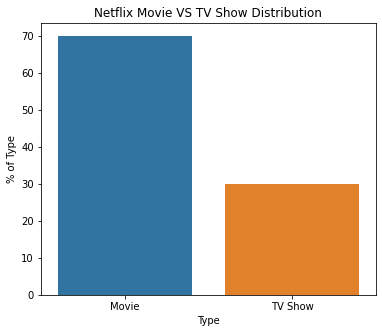

In [28]:
plt.figure(figsize=(6,5))
sns.barplot(x=types['type'],y=types['type_percentage'])
plt.xlabel('Type')
plt.ylabel('% of Type')
plt.title('Netflix Movie VS TV Show Distribution')

Significantly more movies than TV Show's on Netflix

QUESTION: WHAT'S THE DISTRIBUTION OF RATINGS ON NETFLIX IN OTHER WORDS, CAN NETFLIX BE CONSIDERED TO BE FAMILY FRIENDLY?

In [29]:
ratings=netflix_data.groupby('rating').size().reset_index().rename(columns={0:'rating_count'}).sort_values(by='rating_count',ascending=False)
ratings

,rating,rating_count
8,TV-MA,3214
6,TV-14,2160
9,TV-PG,863
5,R,799
4,PG-13,490
11,TV-Y7,334
10,TV-Y,307
3,PG,287
7,TV-G,220
2,NR,80


Text(0.5, 1.0, 'Rating Distribution of Netflix Content')

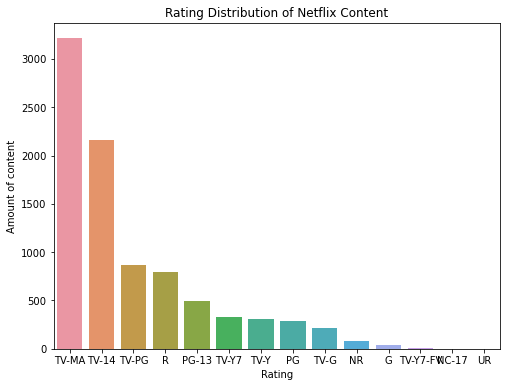

In [30]:
plt.figure(figsize=(8,6))
sns.barplot(x=ratings['rating'],y=ratings['rating_count'])
plt.xlabel('Rating')
plt.ylabel('Amount of content')
plt.title('Rating Distribution of Netflix Content')

Well looks like most of the content on Netflix has the rating 'TV-MA' which means, Mature Audience Only. This means that most of the content on Netflix isn't so family friendly.

QUESTION: HOW MUCH CONTENT WAS ADDED TO NETFLIX OVERTIME

In [31]:
year_added=netflix_data.groupby('year_added').size().reset_index().rename(columns={0:'year_count'}).sort_values(by='year_added')
year_added

,year_added,year_count
0,2008,2
1,2009,2
2,2010,1
3,2011,13
4,2012,3
5,2013,11
6,2014,24
7,2015,82
8,2016,429
9,2017,1188


Text(0, 0.5, 'Amount of Content')

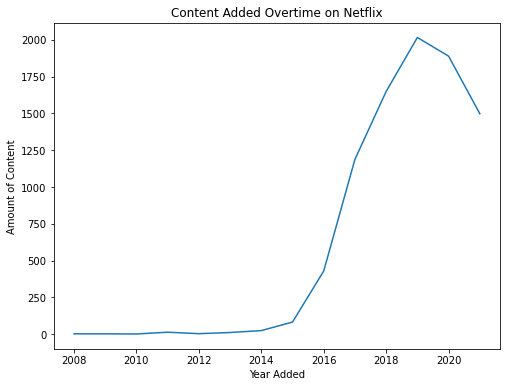

In [32]:
plt.figure(figsize=(8,6))
sns.lineplot(x=year_added['year_added'],y=year_added['year_count'])
plt.title('Content Added Overtime on Netflix')
plt.xlabel('Year Added')
plt.ylabel('Amount of Content')

Around 2016 is when Netflix was really starting to add more content to their platform and it had peaked around 2019.

What are the top production countries on Netflix?

In [33]:
top_production_countries=netflix_data['country'].value_counts().sort_values(ascending=False)[:10].reset_index()
top_production_countries.columns=['Country','Count']

In [34]:
top_production_countries

,Country,Count
0,United States,2818
1,India,972
2,Unknown,831
3,United Kingdom,419
4,Japan,245
5,South Korea,199
6,Canada,181
7,Spain,145
8,France,124
9,Mexico,110


Text(0.5, 1.0, 'Top Production Countries')

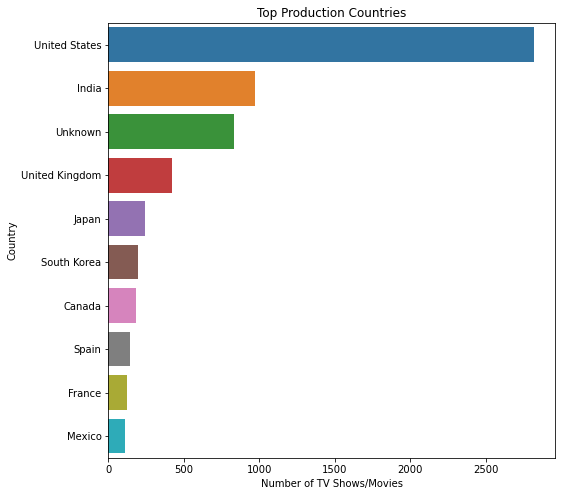

In [35]:
plt.figure(figsize=(8,8))
sns.barplot(x=top_production_countries['Count'],y=top_production_countries['Country'])
plt.xlabel('Number of TV Shows/Movies')
plt.title('Top Production Countries')

The good old United States of America is the top production country, no suprises there, but didn't know bollywood was this Big!

When was most of the content on Netflix released? will I have a better chance of finding classics or remakes of classics?

In [36]:
release_years=netflix_data[['release_year']].value_counts().sort_values(ascending=False).reset_index()
release_years.columns=['release_year','number of shows']
release_years

,release_year,number of shows
0,2018,1147
1,2017,1032
2,2019,1030
3,2020,953
4,2016,902
...,...,...
69,1959,1
70,1961,1
71,1947,1
72,1966,1


Well looks like most of the content on Netflix are new releases

<AxesSubplot:xlabel='release_year', ylabel='number of shows'>

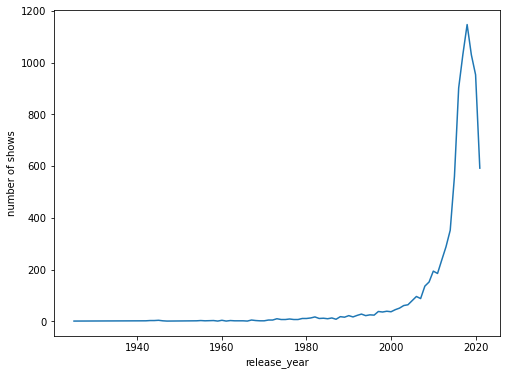

In [37]:
plt.figure(figsize=(8,6))
sns.lineplot(x=release_years['release_year'],y=release_years['number of shows'])

Clearly Netflix has mostly new content.

Since most of the content on Netflix seems to be from the 2010's, let's see which years in particular dominated the scene.

In [38]:
top_release_years=netflix_data[['release_year']].value_counts().sort_values(ascending=False)[:10].reset_index()
top_release_years.columns=['release_year','number of shows']
top_release_years

,release_year,number of shows
0,2018,1147
1,2017,1032
2,2019,1030
3,2020,953
4,2016,902
5,2021,592
6,2015,560
7,2014,352
8,2013,288
9,2012,237


<AxesSubplot:xlabel='release_year', ylabel='number of shows'>

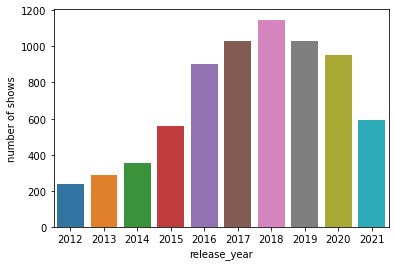

In [39]:
sns.barplot(x=top_release_years['release_year'],y=top_release_years['number of shows'])

Most of the content on Netflix was released in 2018

I think it would now be interesting to see when was most of the content on Netflix added

In [40]:
year_added=netflix_data.groupby('year_added').size().reset_index().rename(columns={0:'year_count'}).sort_values(by='year_added')
year_added

,year_added,year_count
0,2008,2
1,2009,2
2,2010,1
3,2011,13
4,2012,3
5,2013,11
6,2014,24
7,2015,82
8,2016,429
9,2017,1188


Let's see that graphically:

Text(0.5, 1.0, 'Content Added on Netflix Overtime')

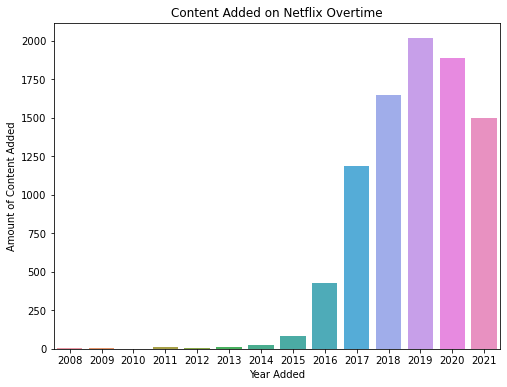

In [41]:
plt.figure(figsize=(8,6))
sns.barplot(x=year_added['year_added'],y=year_added['year_count'])
plt.xlabel('Year Added')
plt.ylabel('Amount of Content Added')
plt.title('Content Added on Netflix Overtime')

Looks like Netflix really started adding more content to their platform around 2016 and the year in which most of the content was added is 2019.

LET ME MAKE DIFFERENT DATASET'S FOR MOVIES AND TV SHOWS AND EXPLORE AND ANALYSE THEM INDIVIDUALLY

In [42]:
#Dataframe for just movies
netflix_movies=netflix_data[netflix_data['type']=='Movie']
netflix_movies.head(3)

,type,title,director,cast,country,date_added,month_added,year_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,9,2021,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,2021-09-24,9,2021,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,9,2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."


In [43]:
#dataframe for just TV Shows
netflix_shows=netflix_data[netflix_data['type']=='TV Show']
netflix_shows.head(3)

,type,title,director,cast,country,date_added,month_added,year_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,,,
s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,9,2021,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,9,2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,9,2021,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."


QUESTION: HOW LONG DO NETFLIX SHOWS LAST?

In [44]:
show_duration=netflix_shows.groupby('duration').size().reset_index().rename(columns={0:'duration_count'}).sort_values(by='duration_count',ascending=False)
show_duration

,duration,duration_count
0,1 Season,1793
7,2 Seasons,425
8,3 Seasons,199
9,4 Seasons,95
10,5 Seasons,65
11,6 Seasons,33
12,7 Seasons,23
13,8 Seasons,17
14,9 Seasons,9
1,10 Seasons,7


In [45]:
#create new column showing the percentage of shows with a particular season
show_duration['duration_%']=show_duration['duration_count'].apply(lambda d:round((d/show_duration['duration_count'].sum())*100,2))
show_duration

,duration,duration_count,duration_%
0,1 Season,1793,67.00
7,2 Seasons,425,15.88
8,3 Seasons,199,7.44
9,4 Seasons,95,3.55
10,5 Seasons,65,2.43
11,6 Seasons,33,1.23
12,7 Seasons,23,0.86
13,8 Seasons,17,0.64
14,9 Seasons,9,0.34
1,10 Seasons,7,0.26


Well looks like most (67%) of the Shows on Netflix only last one season, let me display that graphically

Text(0.5, 1.0, 'How Long Netflix Shows Last')

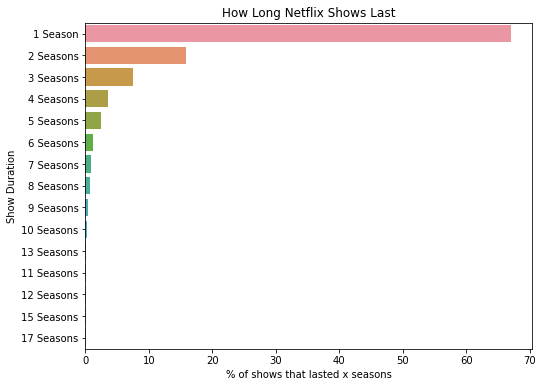

In [46]:
plt.figure(figsize=(8,6))
sns.barplot(x=show_duration['duration_%'],y=show_duration['duration'])
plt.ylabel('Show Duration')
plt.xlabel('% of shows that lasted x seasons')
plt.title('How Long Netflix Shows Last')

From the graph it becomes even more apparent that as the number of seasons increase, the amount of shows decrease. Most shows don't make it past the first season.

Looks like one show in particular is 17 season's long, let's find out what it is.

In [47]:
#what's the longest running show on Netflix?
longest_running_show=netflix_data[(netflix_data['type']=='TV Show') & (netflix_data['duration']=='17 Seasons')]['title'][0]
longest_running_show

"Grey's Anatomy"

Grey's Anatomy is the longest running TV Show on Netlix, unemployed people like me looking for something to binge on, Stand UP!"

Now let's look at how long Netflix movies last

In [48]:

netflix_movies['duration_in_minutes']=netflix_movies['duration'].str.extract('(\d+)')
netflix_movies['duration_in_minutes']=netflix_movies.loc[:,'duration_in_minutes'].astype(float)
netflix_movies.head()

<ipython-input-48-9e30ebefc736>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_movies['duration_in_minutes']=netflix_movies['duration'].str.extract('(\d+)')
<ipython-input-48-9e30ebefc736>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_movies['duration_in_minutes']=netflix_movies.loc[:,'duration_in_minutes'].astype(float)


,type,title,director,cast,country,date_added,month_added,year_added,release_year,rating,duration,listed_in,description,duration_in_minutes
show_id,,,,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,9,2021,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0
s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,2021-09-24,9,2021,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91.0
s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,9,2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",125.0
s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,9,2021,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,104.0
s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,9,2021,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,127.0


In [49]:
netflix_movies[['duration_in_minutes']].describe()

,duration_in_minutes
count,6131.000000
mean,99.564998
std,28.289504
min,3.000000
25%,87.000000
50%,98.000000
75%,114.000000
max,312.000000


The average Netflix movie runs for 99.57 minutes~1,67 hours

The longest running movie on Netflix takes a whopping 312 minutes==5.2 hours. I wonder what's the name of the movie, well let's find out.

In [50]:
#The longest running movie on Netflix
netflix_movies[netflix_movies['duration_in_minutes']==netflix_movies['duration_in_minutes'].max()]['title'][0]

'Black Mirror: Bandersnatch'

The shortest running Movie on Netflix takes only 3 minutes, that's shorter than some youtube ads, but still lasts longer than me.

In [51]:
#The shortest running movie on Netflix
netflix_movies[netflix_movies['duration_in_minutes']==netflix_movies['duration_in_minutes'].min()]['title'][0]

'Silent'

As a South African, though can't really say a proud one because my computer may shut down anytime now (thanks Eskom, Ok I digress) back to Netflix, lets see how much content on Netflix is South African

In [52]:
netflix_south_africa=netflix_data[netflix_data['country']=='South Africa']
netflix_south_africa.head(3)

,type,title,director,cast,country,date_added,month_added,year_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,,,
s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,9,2021,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s294,Movie,Slay,Adze Ugah,"Enhle Mbali, Ramsey Nouah, Dawn Thandeka Kang,...",South Africa,2021-08-08,8,2021,2021,TV-MA,86 min,"Comedies, International Movies, Romantic Movies","In pursuit of both success and validation, a g..."
s765,Movie,Trippin' with the Kandasamys,Jayan Moodley,"Jailoshini Naidoo, Maeshni Naicker, Madhushan ...",South Africa,2021-06-04,6,2021,2021,TV-14,94 min,"Comedies, International Movies, Romantic Movies","To rekindle their marriages, best friends-turn..."


In [53]:
round((netflix_south_africa.shape[0]/netflix_data.shape[0])*(100),2)

0.34

Welp looks like only 0.34% of netflix content is South African, no wonder DSTV still has us on chokehold.